<a href="https://colab.research.google.com/github/nicolasvazquez95/Aprendiendo_DeepLearning/blob/main/05_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

# Helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 
import helper_functions as helper

--2022-01-24 17:26:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-24 17:26:26 (48.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
helper.unzip_data('10_food_classes_10_percent.zip')

--2022-01-24 13:45:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  55.4MB/s    in 2.9s    

2022-01-24 13:45:59 (55.4 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Load data
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

IMG_SIZE = (224,224)

train_data = keras.preprocessing.image_dataset_from_directory(train_dir,
                                                              label_mode='categorical',
                                                              batch_size=32,
                                                              image_size=IMG_SIZE)
test_data = keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              batch_size=32,
                                                              image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# Model_0

In [ ]:
# Model_0: Keras Functional API
base = keras.applications.EfficientNetB0(include_top=False)
base.trainable = False

# Input 
inputs = keras.layers.Input(shape=(224,224,3),name='input_layer')
x = base(inputs)

# Global Average Pooling
x = keras.layers.GlobalAveragePooling2D(name='global_average')(x)

#Output
outputs = keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_0 = keras.Model(inputs,outputs)

# Compile
model_0.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# Fit 
history_0 = model_0.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=int(0.3*len(test_data)),
            callbacks=[helper.create_tensorboard_callback('tensorboard','model_0')])

Saving TensorBoard log files to: tensorboard/model_0/20220124-134608
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 26s 438ms/step - loss: 1.9458 - accuracy: 0.3760 - val_loss: 1.4202 - val_accuracy: 0.6522
Epoch 2/5
24/24 [==============================] - 7s 276ms/step - loss: 1.1731 - accuracy: 0.7360 - val_loss: 0.9688 - val_accuracy: 0.7948
Epoch 3/5
24/24 [==============================] - 7s 273ms/step - loss: 0.8569 - accuracy: 0.7987 - val_loss: 0.7888 - val_accuracy: 0.8111
Epoch 4/5
24/24 [==============================] - 7s 274ms/step - loss: 0.6988 - accuracy: 0.8307 - val_loss: 0.6960 - val_accuracy: 0.8288
Epoch 5/5
24/24 [==============================] - 7s 270ms/step - loss: 0.6058 - accuracy: 0.8573 - val_loss: 0.6180 - val_accuracy: 0.8342


In [ ]:
# Evaluate on the whole test data
model_0.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.6207 - accuracy: 0.8416


[0.6206536889076233, 0.8416000008583069]

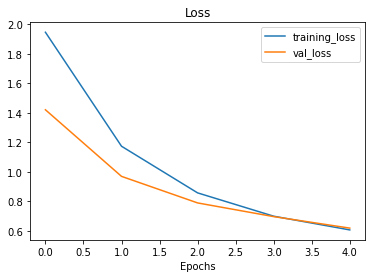

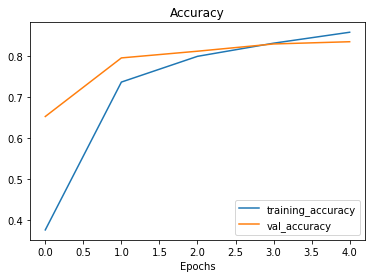

In [ ]:
helper.plot_loss_curves(history_0)

# Model_1 with 1% of the data

In [ ]:
# Prepare the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
helper.unzip_data('10_food_classes_1_percent.zip')

train_dir_1p = '10_food_classes_1_percent/train/'
test_dir_1p = '10_food_classes_1_percent/test/'

train_data_1p = keras.preprocessing.image_dataset_from_directory(train_dir_1p,
                                                              label_mode='categorical',
                                                              batch_size=32,
                                                              image_size=IMG_SIZE)
test_data_1p = keras.preprocessing.image_dataset_from_directory(test_dir_1p,
                                                              label_mode='categorical',
                                                              batch_size=32,
                                                              image_size=IMG_SIZE)

--2022-01-24 13:47:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   228MB/s    in 0.6s    

2022-01-24 13:47:31 (228 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Build a data augmentation layer
data_augmentation = keras.models.Sequential([
  keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'),
  keras.layers.experimental.preprocessing.RandomRotation(0.2),
  keras.layers.experimental.preprocessing.RandomZoom(0.2),
  keras.layers.experimental.preprocessing.RandomWidth(0.2),
  keras.layers.experimental.preprocessing.RandomHeight(0.2)],
  name='data_augmentation'
  )

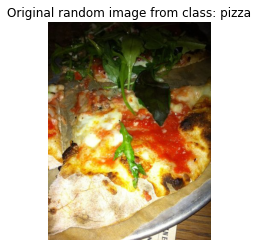

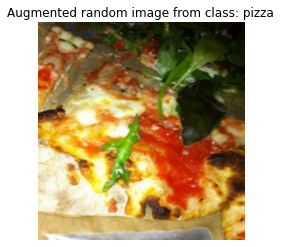

In [ ]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1p.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
# Model_1
input_shape = (224,224,3)

base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = keras.layers.Input(shape=(input_shape),name='input_layer')
# Add data augmentation as layer
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = keras.layers.GlobalAveragePooling2D(name='AvgPooling_layer')(x)
outputs = keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_1 = keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data_1p,epochs=5,steps_per_epoch=len(train_data_1p),
            validation_data=test_data,validation_steps=int(0.3*len(test_data_1p)),
            callbacks=[helper.create_tensorboard_callback('tensorboard','model_1')])

Saving TensorBoard log files to: tensorboard/model_1/20220124-134736
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


3/3 [==============================] - 16s 4s/step - loss: 2.3646 - accuracy: 0.0571 - val_loss: 2.2704 - val_accuracy: 0.1658
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1508 - accuracy: 0.2000 - val_loss: 2.1489 - val_accuracy: 0.2201
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9776 - accuracy: 0.3714 - val_loss: 2.0552 - val_accuracy: 0.2690
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.7582 - accuracy: 0.5714 - val_loss: 1.9686 - val_accuracy: 0.3261
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.6294 - accuracy: 0.7429 - val_loss: 1.8733 - val_accuracy: 0.3886


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 10s 124ms/step - loss: 1.8665 - accuracy: 0.3960


[1.866523027420044, 0.3959999978542328]

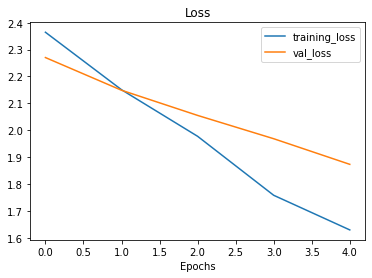

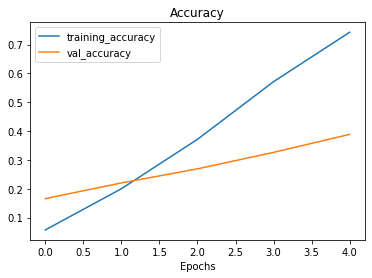

In [ ]:
helper.plot_loss_curves(history_1)

# Model_2 

In [ ]:
# Model_2
base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Layers of the model
inputs = keras.layers.Input(shape=input_shape,name='input_shape')
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = keras.layers.GlobalAveragePooling2D(name='AvgPooling_layer')(x)
outputs = keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_2 = keras.Model(inputs,outputs)
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
# Add a ModelCheckpoint() callbacck
ckpt_callback = keras.callbacks.ModelCheckpoint('checkpoints/model_2/model_2.ckpt',verbose=1,save_best_only=False,
                                                save_weights_only=True)

history_2 = model_2.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=int(0.3*len(test_data)),
            callbacks=[helper.create_tensorboard_callback('tensorboard','model_2'),
                       ckpt_callback]
            )
            

Saving TensorBoard log files to: tensorboard/model_2/20220124-134843
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 2.0129 - accuracy: 0.3333
Epoch 00001: saving model to checkpoints/model_2/model_2.ckpt
24/24 [==============================] - 24s 694ms/step - loss: 2.0129 - accuracy: 0.3333 - val_loss: 1.5040 - val_accuracy: 0.6250
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3550 - accuracy: 0.6680
Epoch 00002: saving model to checkpoints/model_2/model_2.ckpt
24/24 [==============================] - 16s 629ms/step - loss: 1.3550 - accuracy: 0.6680 - val_loss: 1.0874 - val_accuracy: 0.7432
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0541 - accuracy: 0.7467
Epoch 00003: saving model to checkpoints/model_2/model_2.ckpt
24/24 [==============================] - 17s 713ms/step - loss: 1.0541 - accuracy: 0.7467 - val_loss: 0.8704 - val_accuracy: 0.7758
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8808 - accuracy: 0.7880
Epoch 00004: saving model to checkpoints/model_2/model_2

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 124ms/step - loss: 0.6948 - accuracy: 0.8200


[0.6948205828666687, 0.8199999928474426]

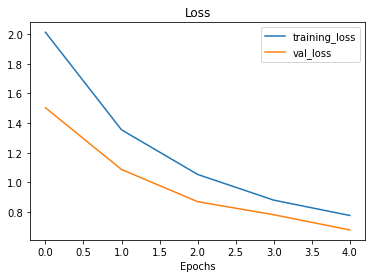

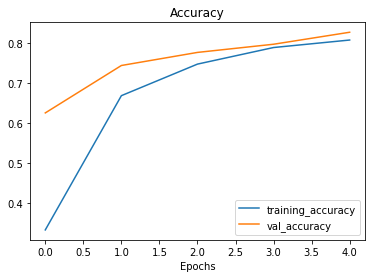

In [ ]:
helper.plot_loss_curves(history_2)

# Fine_tuning (Model_3)

In [ ]:
## Model_3: Fine-tuning
## Setting the last 10 layers of EfficientNet trainable

base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

#for i, layer in enumerate(model_2.layers[2].layers):
#  print(i,layer.name,layer.trainable)

In [ ]:
# Recompile after changes
model_2.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 AvgPooling_layer (GlobalAve  (None, 1280)             0         
 ragePooling2D)                                                  
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [ ]:
history_3 = model_2.fit(train_data,epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=int(0.3*len(test_data),),
            initial_epoch=history_2.epoch[-1],
            callbacks=[helper.create_tensorboard_callback('tensorboard','model_2_fine_tuning_last10')])

Saving TensorBoard log files to: tensorboard/model_2_fine_tuning_last10/20220124-135040
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 24s 664ms/step - loss: 0.6892 - accuracy: 0.8120 - val_loss: 0.5468 - val_accuracy: 0.8342
Epoch 6/10
24/24 [==============================] - 15s 600ms/step - loss: 0.5715 - accuracy: 0.8360 - val_loss: 0.5095 - val_accuracy: 0.8424
Epoch 7/10
24/24 [==============================] - 13s 519ms/step - loss: 0.4739 - accuracy: 0.8640 - val_loss: 0.5041 - val_accuracy: 0.8342
Epoch 8/10
24/24 [==============================] - 13s 509ms/step - loss: 0.4431 - accuracy: 0.8747 - val_loss: 0.5054 - val_accuracy: 0.8451
Epoch 9/10
24/24 [==============================] - 12s 513ms/step - loss: 0.3892 - accuracy: 0.8813 - val_loss: 0.4790 - val_accuracy: 0.8438
Epoch 10/10
24/24 [==============================] - 12s 492ms/step - loss: 0.3579 - accuracy: 0.8947 - val_loss: 0.4942 - val_accuracy: 0.8356


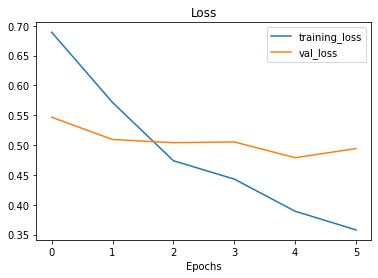

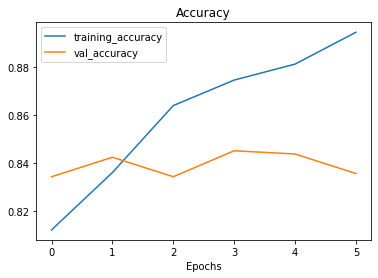

In [ ]:
helper.plot_loss_curves(history_3)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 125ms/step - loss: 0.5200 - accuracy: 0.8252


[0.5199683904647827, 0.8252000212669373]

In [18]:
f compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.3333333432674408, 0.6679999828338623, 0.746666669845581, 0.7879999876022339, 0.8066666722297668, 0.8119999766349792, 0.8360000252723694, 0.8640000224113464, 0.874666690826416, 0.8813333511352539, 0.8946666717529297]


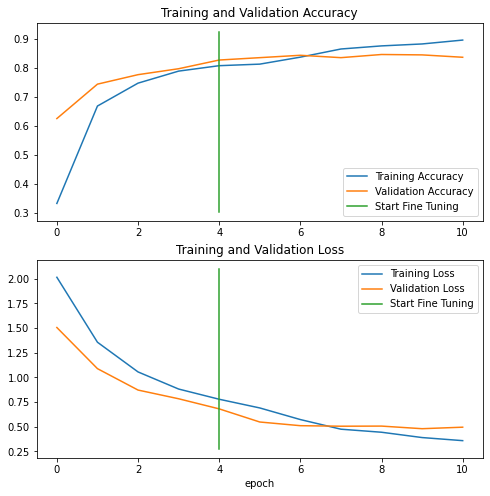

In [ ]:
compare_historys(original_history=history_2, 
                 new_history=history_3, 
                 initial_epochs=5)

# Fine_tuning 100% (Model_4)

In [ ]:
# Model_3 :  Todo junto, todos los datos

## Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
helper.unzip_data('10_food_classes_all_data.zip')

## Load data 
train_dir_all = '10_food_classes_all_data/train/'
test_dir_all = '10_food_classes_all_data/test/'

train_data_all = keras.preprocessing.image_dataset_from_directory(train_dir_all,
                                                              label_mode='categorical',
                                                              batch_size=32,
                                                              image_size=IMG_SIZE)
test_data_all = keras.preprocessing.image_dataset_from_directory(test_dir_all,
                                                              label_mode='categorical',
                                                              batch_size=32,
                                                              image_size=IMG_SIZE)

--2022-01-24 13:52:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 142.251.8.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  63.5MB/s    in 9.4s    

2022-01-24 13:52:59 (53.0 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# For model_4, we revert model_2 to a previous state, by loading its weights from the checkpoint
model_2.load_weights('checkpoints/model_2/model_2.ckpt')
model_2.evaluate(test_data) # Same as original model_2 :)

79/79 [==============================] - 10s 122ms/step - loss: 0.6948 - accuracy: 0.8200


[0.694820761680603, 0.8199999928474426]

Cuando cargamos los weights, las capas que seteamos `trainable` permanecen `trainable`. 

In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
history_4 = model_2.fit(train_data_all,epochs=10,steps_per_epoch=len(train_data_all),
            validation_data=test_data_all,validation_steps=int(0.3*len(test_data_all)),
            callbacks=[helper.create_tensorboard_callback('tensorboard','model_2_all_data_fine_tuning')],
            initial_epoch=history_2.epoch[-1])

Saving TensorBoard log files to: tensorboard/model_2_all_data_fine_tuning/20220124-141135
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


235/235 [==============================] - 86s 334ms/step - loss: 0.7234 - accuracy: 0.7667 - val_loss: 0.4360 - val_accuracy: 0.8546
Epoch 6/10
235/235 [==============================] - 71s 302ms/step - loss: 0.5892 - accuracy: 0.8117 - val_loss: 0.3917 - val_accuracy: 0.8628
Epoch 7/10
235/235 [==============================] - 68s 286ms/step - loss: 0.5302 - accuracy: 0.8268 - val_loss: 0.3866 - val_accuracy: 0.8668
Epoch 8/10
235/235 [==============================] - 67s 282ms/step - loss: 0.4784 - accuracy: 0.8420 - val_loss: 0.3593 - val_accuracy: 0.8818
Epoch 9/10
235/235 [==============================] - 58s 244ms/step - loss: 0.4327 - accuracy: 0.8609 - val_loss: 0.3355 - val_accuracy: 0.8859
Epoch 10/10
235/235 [==============================] - 58s 245ms/step - loss: 0.4024 - accuracy: 0.8669 - val_loss: 0.3291 - val_accuracy: 0.8899


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 123ms/step - loss: 0.3229 - accuracy: 0.8916


[0.3228834569454193, 0.8916000127792358]

5
11
[0.3333333432674408, 0.6679999828338623, 0.746666669845581, 0.7879999876022339, 0.8066666722297668, 0.7666666507720947, 0.8117333054542542, 0.8267999887466431, 0.8420000076293945, 0.8609333038330078, 0.8669333457946777]


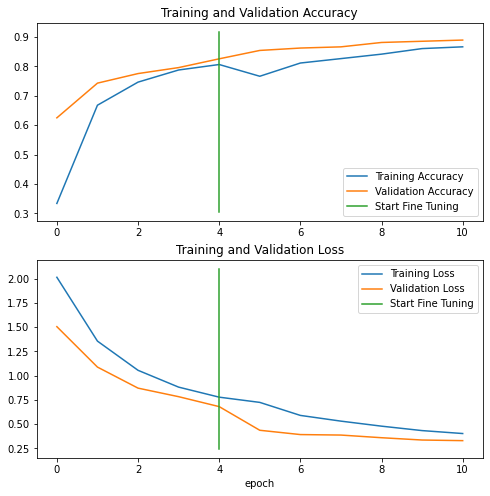

In [ ]:
compare_historys(history_2,history_4)

# TensorBoard

In [ ]:
!tensorboard dev upload --logdir ./tensorboard \
  --name 'Transfer_Learning Experiments Food101' \
  --description "A series of transfer learning experiments varying amounts of data and fine-tuning" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorboard

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=CPfykiFtXjQSIYWBTGvqA3EwVjypoo&prompt=consent&access_type=offline

# Exercises

In [2]:
# Get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
helper.unzip_data('10_food_classes_10_percent.zip')

train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

# Load data 
train_data = keras.preprocessing.image_dataset_from_directory(train_dir,
                                                              label_mode='categorical',
                                                              image_size=(224,224),
                                                              seed=42)
test_data = keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=(224,224),
                                                              seed=42)

--2022-01-24 17:26:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   191MB/s    in 0.8s    

2022-01-24 17:26:27 (191 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [3]:
from keras import layers

# Construct and compile model
base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = keras.layers.Input(shape=(224,224,3),name='input_layer')
x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D(name='AvgPooling_layer')(x)
outputs = layers.Dense(10,activation='softmax',name='output_layer')(x)

model_5 = keras.Model(inputs,outputs)

model_5.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

16719872/16705208 [==============================] - 0s 0us/step


In [4]:
#model_5.summary()
ckpt_filepath = "checkpoints/model_5/model_5-{epoch:02d}.ckpt"
ckpt_callback = keras.callbacks.ModelCheckpoint(ckpt_filepath,verbose=1,save_weights_only=True)
history_5 = model_5.fit(train_data,epochs=10,steps_per_epoch=len(train_data),
                        validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                        callbacks=[helper.create_tensorboard_callback('exercises_tboard','model_5'),
                                   ckpt_callback])

Saving TensorBoard log files to: exercises_tboard/model_5/20220124-172635


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.8711 - accuracy: 0.4093
Epoch 00001: saving model to checkpoints/model_5/model_5-01.ckpt
24/24 [==============================] - 23s 367ms/step - loss: 1.8711 - accuracy: 0.4093 - val_loss: 1.3259 - val_accuracy: 0.6924
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.1027 - accuracy: 0.7507
Epoch 00002: saving model to checkpoints/model_5/model_5-02.ckpt
24/24 [==============================] - 7s 271ms/step - loss: 1.1027 - accuracy: 0.7507 - val_loss: 0.8801 - val_accuracy: 0.8026
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.8026 - accuracy: 0.8147
Epoch 00003: saving model to checkpoints/model_5/model_5-03.ckpt
24/24 [==============================] - 7s 268ms/step - loss: 0.8026 - accuracy: 0.8147 - val_loss: 0.6997 - val_accuracy: 0.8454
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.6516 - accuracy: 0.8493
Epoch 00004: saving model to checkp

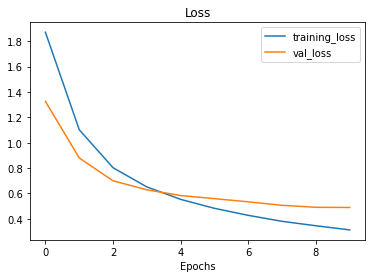

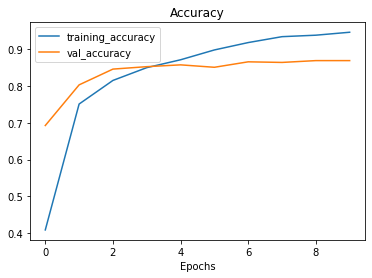

In [5]:
helper.plot_loss_curves(history_5)

In [11]:
model_5.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 0.4949 - accuracy: 0.8528


[0.49488794803619385, 0.8528000116348267]

Sin la capa de aumentación de datos, es claro que estamos overfiteando el problema debido a la poca cantidad de datos disponibles.
Repito abajo, pero agrego la capa tal como la armamos en los videos

In [8]:
# Build a data augmentation layer
data_augmentation = keras.models.Sequential([
  keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'),
  keras.layers.experimental.preprocessing.RandomRotation(0.2),
  keras.layers.experimental.preprocessing.RandomZoom(0.2),
  keras.layers.experimental.preprocessing.RandomWidth(0.2),
  keras.layers.experimental.preprocessing.RandomHeight(0.2)],
  name='data_augmentation'
  )

In [9]:
# Model_6
base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Layers of the model
inputs = keras.layers.Input(shape=(224,224,3),name='input_shape')
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = keras.layers.GlobalAveragePooling2D(name='AvgPooling_layer')(x)
outputs = keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_6 = keras.Model(inputs,outputs)
model_6.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [10]:
#model_6.summary()
ckpt_filepath = "checkpoints/model_6/model_6-e{epoch:02d}.ckpt"
ckpt_callback = keras.callbacks.ModelCheckpoint(ckpt_filepath,verbose=1,save_weights_only=True)
history_6 = model_6.fit(train_data,epochs=10,steps_per_epoch=len(train_data),
                        validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                        callbacks=[helper.create_tensorboard_callback('exercises_tboard','model_6'),
                                   ckpt_callback])

Saving TensorBoard log files to: exercises_tboard/model_6/20220124-173149
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 2.0792 - accuracy: 0.3080
Epoch 00001: saving model to checkpoints/model_6/model_6-e01.ckpt
24/24 [==============================] - 28s 867ms/step - loss: 2.0792 - accuracy: 0.3080 - val_loss: 1.5168 - val_accuracy: 0.6316
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.3863 - accuracy: 0.6400
Epoch 00002: saving model to checkpoints/model_6/model_6-e02.ckpt
24/24 [==============================] - 15s 601ms/step - loss: 1.3863 - accuracy: 0.6400 - val_loss: 1.0791 - val_accuracy: 0.7319
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 1.0705 - accuracy: 0.7507
Epoch 00003: saving model to checkpoints/model_6/model_6-e03.ckpt
24/24 [==============================] - 14s 585ms/step - loss: 1.0705 - accuracy: 0.7507 - val_loss: 0.8347 - val_accuracy: 0.8059
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.9131 - accuracy: 0.7867
Epoch 00004: saving model to checkpoints/

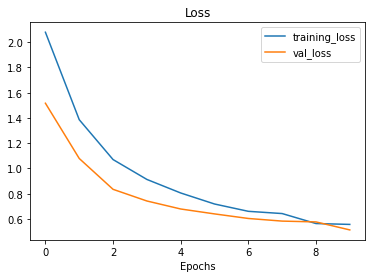

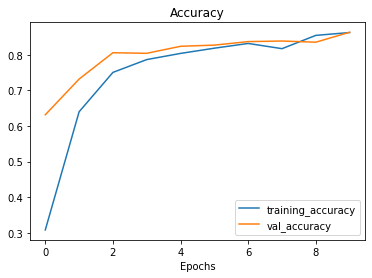

In [13]:
helper.plot_loss_curves(history_6)

In [12]:
model_6.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.5548 - accuracy: 0.8392


[0.5548471212387085, 0.8392000198364258]

In [15]:
# Fine_tune the last 20 layers of efficientnet (lr=1e-4)
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

model_6.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [20]:
history_6_ft20 = model_6.fit(train_data,epochs=20,steps_per_epoch=len(train_data),
                        validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                        callbacks=[helper.create_tensorboard_callback('exercises_tboard','model_6'),
                                   ckpt_callback],
                             initial_epoch=10)

Saving TensorBoard log files to: exercises_tboard/model_6/20220124-173902
Epoch 11/20


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 0.4995 - accuracy: 0.8467
Epoch 00011: saving model to checkpoints/model_6/model_6-e11.ckpt
24/24 [==============================] - 23s 600ms/step - loss: 0.4995 - accuracy: 0.8467 - val_loss: 0.4884 - val_accuracy: 0.8405
Epoch 12/20
24/24 [==============================] - ETA: 0s - loss: 0.3515 - accuracy: 0.8933
Epoch 00012: saving model to checkpoints/model_6/model_6-e12.ckpt
24/24 [==============================] - 12s 473ms/step - loss: 0.3515 - accuracy: 0.8933 - val_loss: 0.4236 - val_accuracy: 0.8470
Epoch 13/20
24/24 [==============================] - ETA: 0s - loss: 0.3064 - accuracy: 0.9147
Epoch 00013: saving model to checkpoints/model_6/model_6-e13.ckpt
24/24 [==============================] - 13s 516ms/step - loss: 0.3064 - accuracy: 0.9147 - val_loss: 0.4617 - val_accuracy: 0.8586
Epoch 14/20
24/24 [==============================] - ETA: 0s - loss: 0.2791 - accuracy: 0.9107
Epoch 00014: saving model to checkpoin

In [21]:
model_6.evaluate(test_data)

79/79 [==============================] - 11s 129ms/step - loss: 0.4996 - accuracy: 0.8432


[0.49962836503982544, 0.8432000279426575]

10
20
[0.30799999833106995, 0.6399999856948853, 0.7506666779518127, 0.7866666913032532, 0.8040000200271606, 0.8186666369438171, 0.8320000171661377, 0.8173333406448364, 0.8546666502952576, 0.862666666507721, 0.846666693687439, 0.8933333158493042, 0.9146666526794434, 0.9106666445732117, 0.9426666498184204, 0.9453333616256714, 0.9599999785423279, 0.9626666903495789, 0.9599999785423279, 0.9800000190734863]


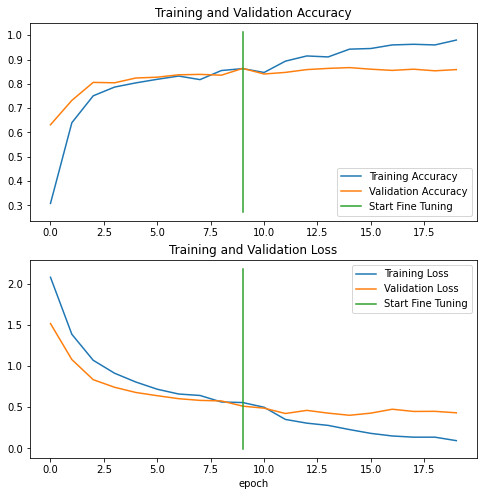

In [22]:
compare_historys(history_6,history_6_ft20,initial_epochs=10)

In [23]:
# Fine_tune the last 30 layers of efficientnet (lr=1e-5)
base_model.trainable = True

for layer in base_model.layers[:-30]:
  layer.trainable = False

model_6.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [25]:
history_6_ft30 = model_6.fit(train_data,epochs=30,steps_per_epoch=len(train_data),
                        validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                        callbacks=[helper.create_tensorboard_callback('exercises_tboard','model_6'),
                                   ckpt_callback],
                             initial_epoch=20)

Saving TensorBoard log files to: exercises_tboard/model_6/20220124-174403
Epoch 21/30


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 0.1130 - accuracy: 0.9680
Epoch 00021: saving model to checkpoints/model_6/model_6-e21.ckpt
24/24 [==============================] - 23s 654ms/step - loss: 0.1130 - accuracy: 0.9680 - val_loss: 0.4683 - val_accuracy: 0.8586
Epoch 22/30
24/24 [==============================] - ETA: 0s - loss: 0.0690 - accuracy: 0.9867
Epoch 00022: saving model to checkpoints/model_6/model_6-e22.ckpt
24/24 [==============================] - 12s 491ms/step - loss: 0.0690 - accuracy: 0.9867 - val_loss: 0.4900 - val_accuracy: 0.8618
Epoch 23/30
24/24 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9733
Epoch 00023: saving model to checkpoints/model_6/model_6-e23.ckpt
24/24 [==============================] - 15s 599ms/step - loss: 0.0859 - accuracy: 0.9733 - val_loss: 0.4633 - val_accuracy: 0.8602
Epoch 24/30
24/24 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9893
Epoch 00024: saving model to checkpoin

In [26]:
model_6.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.5680 - accuracy: 0.8440


[0.5680475831031799, 0.843999981880188]